In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import os
import sys
import random
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette("muted")
random.seed(20241021)
np.random.seed(20241021)
torch.manual_seed(3407) # Torch.manual_seed(3407) is all you need. Paper: http://arxiv.org/abs/2109.08203

# 修改工作路径，使本.ipynb文件能够像在本文件夹根目录下一样导入其他模块
# Modify the working path so that this.ipynb file can import other modules like in the root directory
current_dir = os.path.dirname(os.path.abspath('__file__'))
sys.path.append(os.path.join(current_dir, '..'))

In [2]:
from models.RNN import RNN, LSTM, GRU
from models.CNN import CNN, TCN
from models.MLP import MLP
from models.transformer import Transformer, iTransformer, PatchTST, Reformer, Informer
from models.Linear import LLinear, DLinear, NLinear
from models.stat import Identical, ExponentialMovingAverage, SVR
from gas_data_prediction.utils import FitHistory

# Hyperparameters
num_epochs = 20
learning_rate = 0.001
input_len = 64
output_len = 16
label_len = 0 # label_len should be set only for decoder-based models, or there is potential risk of data leakage.
input_channels = 10
output_channels = 10
batch_size = 32
#device = 'cpu'  # 设备
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Instantiate models, loss functions, evaluation functions, and optimizers
# 实例化模型、损失函数、评估函数和优化器
MODEL = LSTM(
    input_len=input_len, output_len=output_len, input_channels=input_channels, output_channels=output_channels,
    ).to(device)
loss_func = nn.MSELoss()
metric_func=nn.L1Loss()
optimizer = optim.Adam(MODEL.parameters(), lr=learning_rate)
history=FitHistory()
print('Model parameters: ', sum(p.numel() for p in MODEL.parameters()))

Model parameters:  170144


In [3]:
import gas_data_prediction.data_preprocessing as dp

data_paths=["E:\\科创优才\\实验数据\\毕设实验数据\\Testo20240509.xlsx",
           "E:\\科创优才\\实验数据\\毕设实验数据\\testo20240511数据.xlsx",
           "E:\\科创优才\\实验数据\\毕设实验数据\\烟气数据20240514.xlsx",
           "E:\\科创优才\\实验数据\\毕设实验数据\\⁭烟气数据20240516.xlsx"]

var_names=['% O2', 'ppm CO', '% CO2', 'ppm NO', 'ppm NO2', '°C 烟温', 'ppm NOx', 'ppm SO2', '°C 环温', 'l/min 泵流量']

X, Y, X_grouped, Y_grouped, (var_mean, var_std_dev) = dp.get_XY(data_paths, input_len, output_len, label_len=label_len, var_names=var_names, use_filter=False)
train_loader, val_loader, test_loader = dp.get_XY_loaders(X, Y, batch_size=batch_size)

len(X_grouped): 4
len(Y_grouped): 4
X shape:  (1776, 64, 10)
Y shape:  (1776, 16, 10)
Train dataset size: X: (1243, 64, 10); Y: (1243, 16, 10)
Val dataset size: X: (177, 64, 10); Y: (177, 16, 10)
Test dataset size: X: (355, 64, 10); Y: (355, 16, 10)


  5%|▌         | 1/20 [00:04<01:23,  4.41s/it]

Epoch [ 1  /20], Time: 4.3935s, Loss: 0.8296, Metric: 0.5555, Val Loss: 0.4211, Val Metric: 0.3301


 15%|█▌        | 3/20 [00:04<00:19,  1.17s/it]

Epoch [ 2  /20], Time: 0.2311s, Loss: 0.4949, Metric: 0.2968, Val Loss: 0.2959, Val Metric: 0.2302
Epoch [ 3  /20], Time: 0.1628s, Loss: 0.4383, Metric: 0.2441, Val Loss: 0.4141, Val Metric: 0.2408


 25%|██▌       | 5/20 [00:05<00:08,  1.82it/s]

Epoch [ 4  /20], Time: 0.1626s, Loss: 0.4217, Metric: 0.2335, Val Loss: 0.3915, Val Metric: 0.2308
Epoch [ 5  /20], Time: 0.1561s, Loss: 0.4086, Metric: 0.2223, Val Loss: 0.3911, Val Metric: 0.2220


 35%|███▌      | 7/20 [00:05<00:04,  2.99it/s]

Epoch [ 6  /20], Time: 0.1658s, Loss: 0.3984, Metric: 0.2222, Val Loss: 0.2649, Val Metric: 0.1943
Epoch [ 7  /20], Time: 0.1594s, Loss: 0.3855, Metric: 0.2083, Val Loss: 0.2685, Val Metric: 0.2078


 45%|████▌     | 9/20 [00:05<00:02,  4.16it/s]

Epoch [ 8  /20], Time: 0.1693s, Loss: 0.3677, Metric: 0.2056, Val Loss: 0.2524, Val Metric: 0.1733
Epoch [ 9  /20], Time: 0.1470s, Loss: 0.3540, Metric: 0.1937, Val Loss: 0.3667, Val Metric: 0.1792


 55%|█████▌    | 11/20 [00:06<00:01,  5.07it/s]

Epoch [ 10 /20], Time: 0.1685s, Loss: 0.3443, Metric: 0.1796, Val Loss: 0.2423, Val Metric: 0.1842
Epoch [ 11 /20], Time: 0.1504s, Loss: 0.3254, Metric: 0.1829, Val Loss: 0.2500, Val Metric: 0.1859


 65%|██████▌   | 13/20 [00:06<00:01,  5.75it/s]

Epoch [ 12 /20], Time: 0.1501s, Loss: 0.3099, Metric: 0.1716, Val Loss: 0.2442, Val Metric: 0.1770
Epoch [ 13 /20], Time: 0.1506s, Loss: 0.3006, Metric: 0.1795, Val Loss: 0.2490, Val Metric: 0.1782


 75%|███████▌  | 15/20 [00:06<00:00,  5.93it/s]

Epoch [ 14 /20], Time: 0.1530s, Loss: 0.2872, Metric: 0.1731, Val Loss: 0.2463, Val Metric: 0.1555
Epoch [ 15 /20], Time: 0.1699s, Loss: 0.2740, Metric: 0.1648, Val Loss: 0.2678, Val Metric: 0.1784


 85%|████████▌ | 17/20 [00:07<00:00,  6.11it/s]

Epoch [ 16 /20], Time: 0.1598s, Loss: 0.2720, Metric: 0.1700, Val Loss: 0.2514, Val Metric: 0.1676
Epoch [ 17 /20], Time: 0.1564s, Loss: 0.2511, Metric: 0.1656, Val Loss: 0.2548, Val Metric: 0.1641


 95%|█████████▌| 19/20 [00:07<00:00,  6.16it/s]

Epoch [ 18 /20], Time: 0.1591s, Loss: 0.2401, Metric: 0.1590, Val Loss: 0.4123, Val Metric: 0.2028
Epoch [ 19 /20], Time: 0.1612s, Loss: 0.2356, Metric: 0.1633, Val Loss: 0.2653, Val Metric: 0.1746


100%|██████████| 20/20 [00:07<00:00,  2.63it/s]


Epoch [ 20 /20], Time: 0.1529s, Loss: 0.2255, Metric: 0.1578, Val Loss: 0.2395, Val Metric: 0.1563
Total Time: 7.4795s


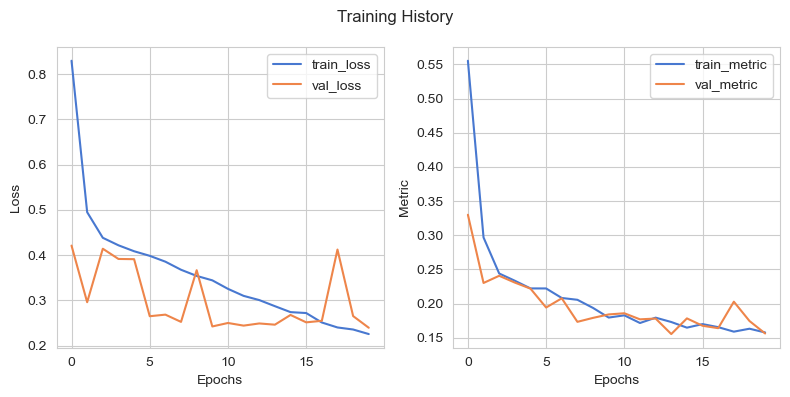

Number of epochs:  20
Training time:     7.4795s
Training loss:     0.2255
Training metric:   0.1578
Validation loss:   0.2395
Validation metric: 0.1563


100%|██████████| 12/12 [00:00<00:00, 927.23it/s]

Loss on test set:  0.42317410218201473


In [4]:
from gas_data_prediction.utils import train, plot_predictions
# train the model
history.update(
            *train(MODEL, train_loader, val_loader, optimizer,
                loss_func=nn.MSELoss(),
                metric_func=nn.L1Loss(),
                num_epochs=num_epochs,
                device=device,
                verbose=1)
            )
history.plot()
history.summary()
print("Loss on test set: ", MODEL.evaluate(test_loader,device=device))

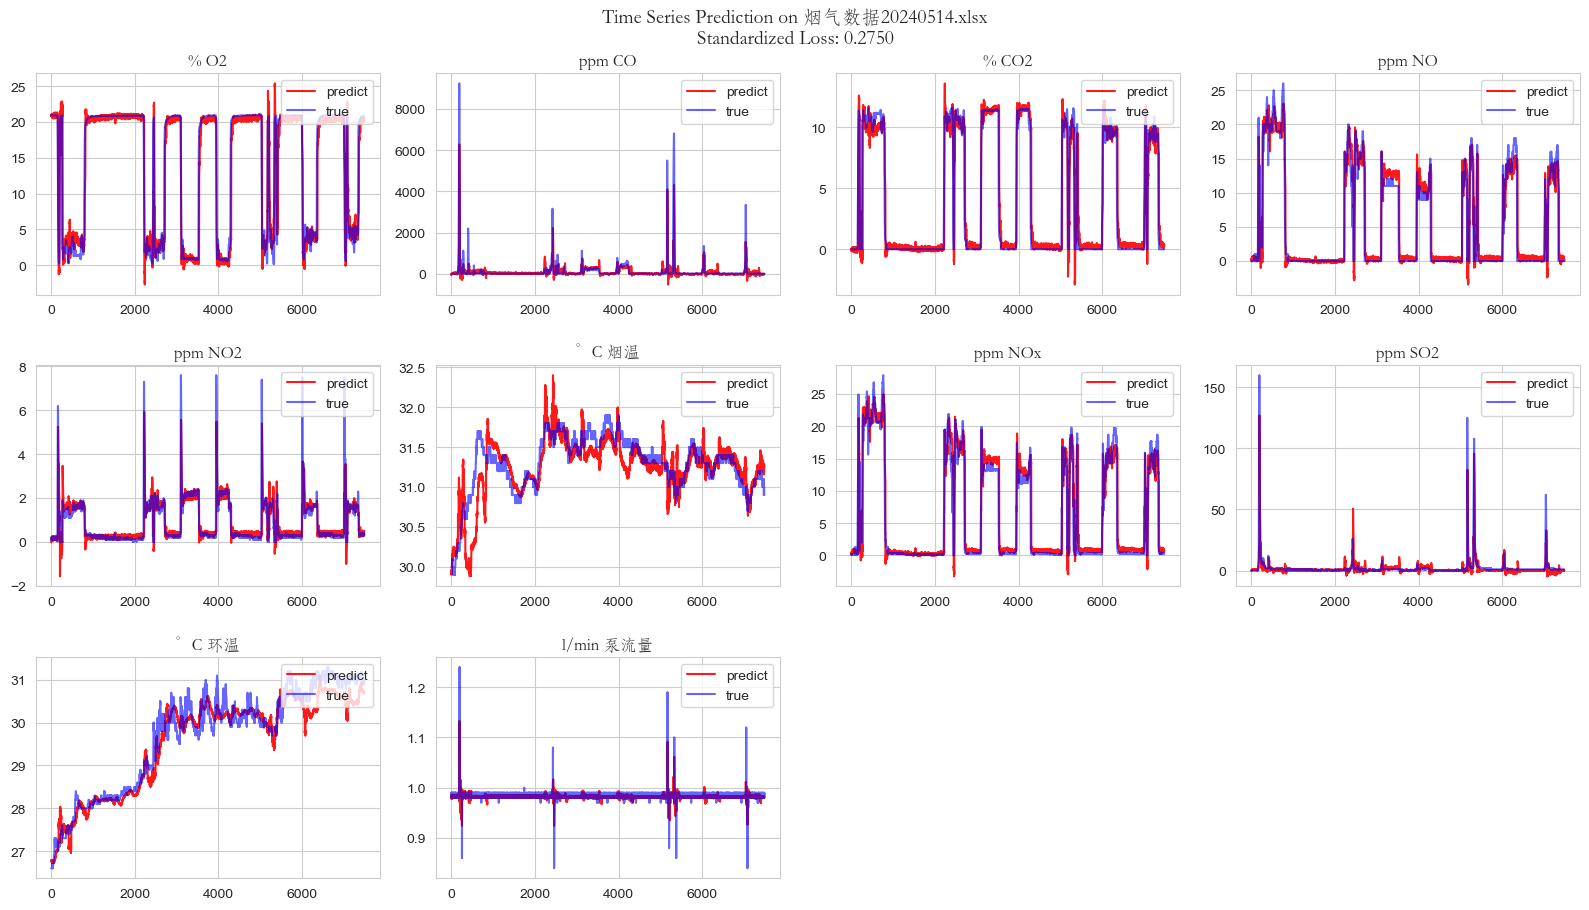

In [5]:
plot_predictions(MODEL, X_grouped, Y_grouped, var_names, data_paths,
                    iii=2,
                    figsize=(16,12),
                    device='cuda',
                    var_mean=var_mean,
                    var_std_dev=var_std_dev,
                    residual_plot=False,
                    )

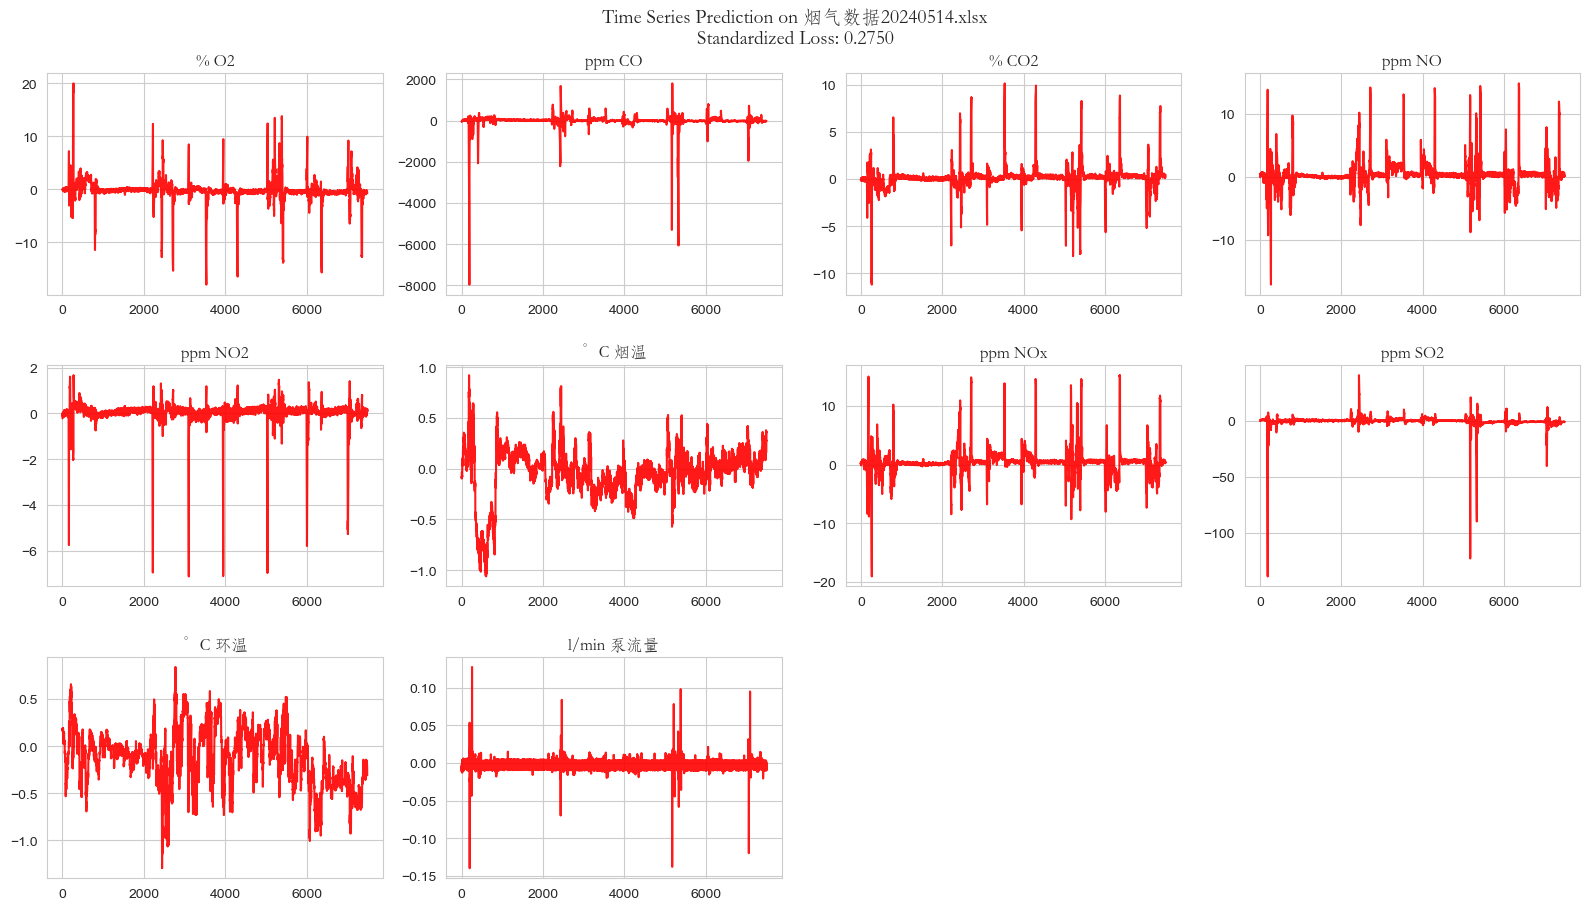

In [6]:
plot_predictions(MODEL, X_grouped, Y_grouped, var_names, data_paths,
                    iii=2,
                    figsize=(16,12),
                    device='cuda',
                    var_mean=var_mean,
                    var_std_dev=var_std_dev,
                    residual_plot=True,
                    )

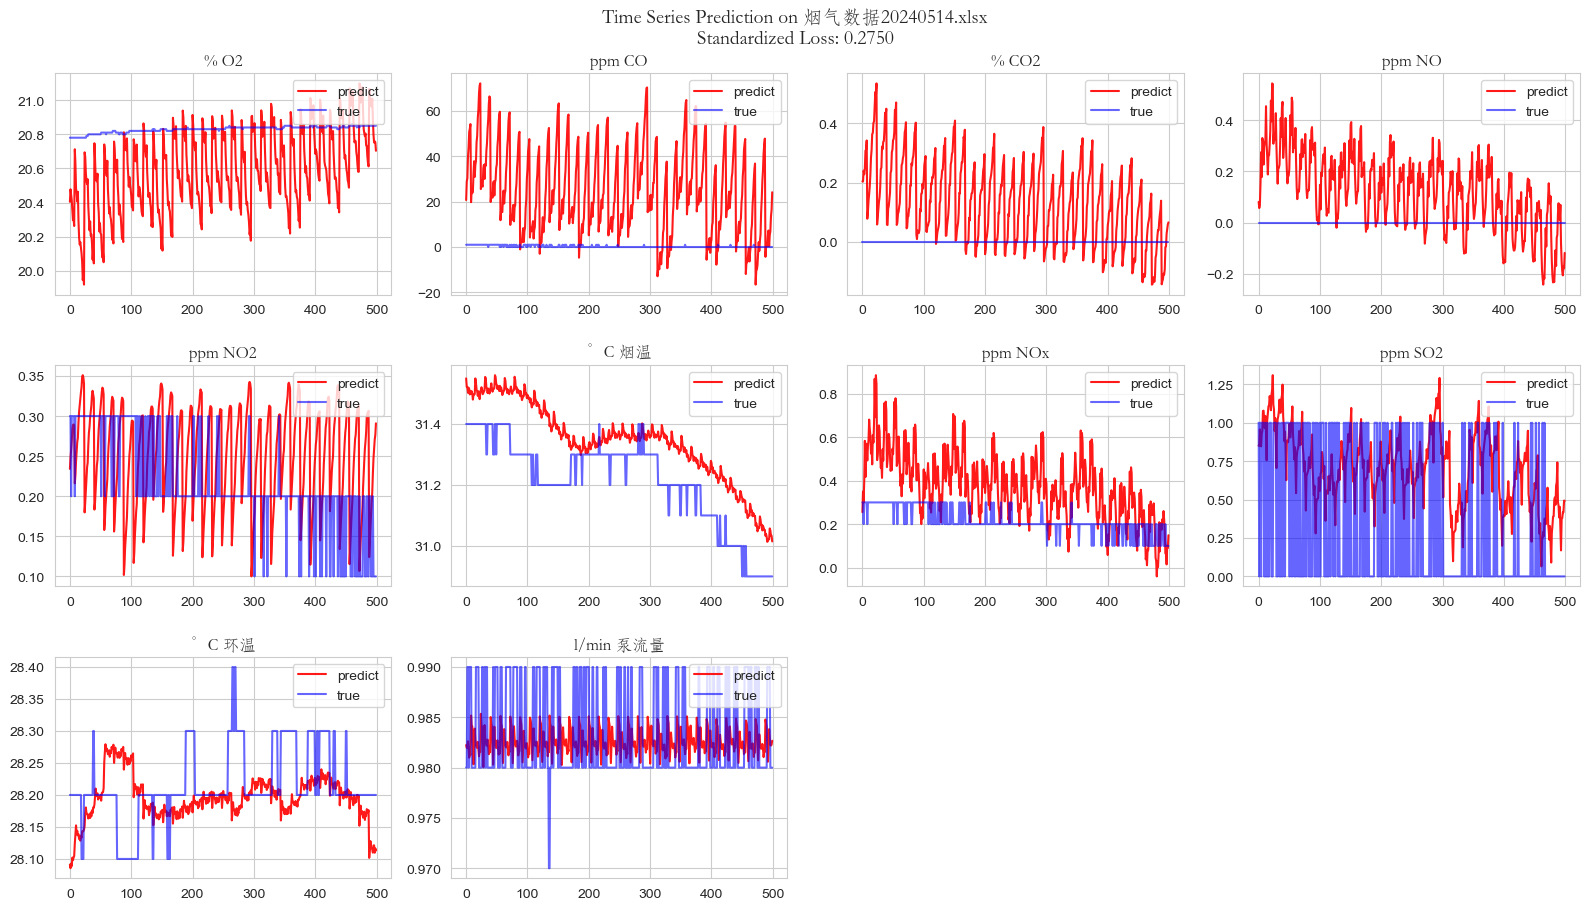

In [7]:
def plot_predictions(MODEL, X_grouped, Y_grouped, var_names, paths,
                    iii=0,
                    figsize=(16,12),
                    device='cpu',
                    var_mean=None,
                    var_std_dev=None,
                    residual_plot=False
                    ):
    '''
    Plot the predictions of the model on a given mat file.
    Parameters:
    - MODEL: torch.nn.Module, the trained model
    - X_grouped: list of (list of (input_length,len(var_names)) numpy array), the input data grouped by mat file
    - Y_grouped: list of (list of (output_length,len(var_names)) numpy array), the output data grouped by mat file
    - var_names: list of strings, the names of the variables
    - paths: list of strings, the paths of the data files
    - iii: int, the index of the mat file to be plotted
    - figsize: tuple of int, the size of the figure
    Return:
    - None
    '''
    # iii=43 # 要在某个mat文件上做预测,选中mat编号(iii)（建议落在测试集对应的编号范围内）

    try:
        from matplotlib.font_manager import FontProperties
        font1 = FontProperties(fname=r"C:\\Windows\\Fonts\\STFANGSO.ttf", size=14)
        font2 = FontProperties(fname=r"C:\\Windows\\Fonts\\STFANGSO.ttf", size=12)
        font3 = FontProperties(fname=r"C:\\Windows\\Fonts\\STFANGSO.ttf", size=10)
        font4 = FontProperties(fname=r"C:\\Windows\\Fonts\\STFANGSO.ttf", size=7)
    except:
        raise Exception("请确保您的系统为Windows系统，并安装了STFANGSO.ttf字体")

    var_mean=var_mean if var_mean is not None else np.zeros(len(var_names)) # 如果给定了变量均值，则使用给定值；否则使用全零均值
    var_std_dev=var_std_dev if var_std_dev is not None else np.ones(len(var_names)) # 如果给定了变量标准差，则使用给定值；否则使用全一标准差

    X_to_predict=[] # 作为输入的真实数据
    Y_to_predict=[] # 待预测的真实数据

    for i in range(len(X_grouped[iii])):
        X_to_predict.append(X_grouped[iii][i])
    X_to_predict=np.array(X_to_predict) # X_to_predict: numpy array. Shape: (num_batches, input_len, input_channels)

    for i in range(len(Y_grouped[iii])):
        Y_to_predict.append(Y_grouped[iii][i])
    Y_to_predict=np.array(Y_to_predict) # Y_to_predict: numpy array. Shape: (num_batches, output_len, output_channels):

    if hasattr(MODEL, 'label_len') and MODEL.label_len > 0: # 如果模型含有label_len属性，说明前向传播过程需要解码器输入
        label_len=MODEL.label_len
        output_len=MODEL.output_len
        pred_len=output_len-label_len
        dec_inp = torch.zeros_like(torch.Tensor(Y_to_predict[:, -pred_len:, :])).float().to(device)
        dec_inp = torch.cat([torch.Tensor(Y_to_predict[:, :label_len, :]).to(device), dec_inp], dim=1).float().to(device)
        Y_to_predict=Y_to_predict[:, -pred_len:, :] # 取待预测时间范围内的数据
        Y_predicted=MODEL(torch.Tensor(X_to_predict).to(device), dec_inp).cpu().detach().numpy() # 根据X_to_predict预测到的数据
    else: # 如果模型不含有label_len属性，说明前向传播过程不需要解码器输入
        Y_predicted=MODEL(torch.Tensor(X_to_predict).to(device)).cpu().detach().numpy() # 根据X_to_predict预测到的数据

    output_channels=Y_predicted.shape[2]
    Y_predicted_flatten=Y_predicted.reshape(-1,output_channels)
    Y_to_predict_flatten=Y_to_predict.reshape(-1,output_channels)
    loss=np.mean((Y_predicted_flatten-Y_to_predict_flatten)**2) # 计算预测误差

    Y_predicted_flatten=(Y_predicted_flatten*var_std_dev)+var_mean # 还原真实值
    Y_to_predict_flatten=(Y_to_predict_flatten*var_std_dev)+var_mean # 还原真实值

    Y_predicted_flatten=Y_predicted_flatten[1000:1500,:]
    Y_to_predict_flatten=Y_to_predict_flatten[1000:1500,:]
    if residual_plot==False:
        plt.figure(figsize=figsize) # figsize is specified in the function parameter
        import os
        plt.suptitle('Time Series Prediction on {}\nStandardized Loss: {:.4f}'.format(
                    os.path.basename(paths[iii]), loss),
                    fontproperties=font1)
        for var_name in var_names:
            var_idx=var_names.index(var_name)
            plt.subplot(4, 4, var_idx+1)
            plt.plot(Y_predicted_flatten[:,var_idx], alpha=0.9, c='red')
            plt.plot(Y_to_predict_flatten[:,var_idx], alpha=0.6, c='blue')
            plt.legend(['predict', 'true'], loc='upper right')
            plt.title(var_name, fontproperties=font2)
        plt.tight_layout(h_pad=2)
        #plt.savefig("", bbox_inches='tight')
        plt.show()
        return
    elif residual_plot==True:
        plt.figure(figsize=figsize) # figsize is specified in the function parameter
        import os
        plt.suptitle('Time Series Prediction on {}\nStandardized Loss: {:.4f}'.format(
                    os.path.basename(paths[iii]), loss),
                    fontproperties=font1)
        for var_name in var_names:
            var_idx=var_names.index(var_name)
            plt.subplot(4, 4, var_idx+1)
            plt.plot(Y_predicted_flatten[:,var_idx]-Y_to_predict_flatten[:,var_idx], alpha=0.9, c='red')
            plt.title(var_name, fontproperties=font2)
        plt.tight_layout(h_pad=2)
        #plt.savefig("", bbox_inches='tight')
        plt.show()
        return
plot_predictions(MODEL, X_grouped, Y_grouped, var_names, data_paths,
                    iii=2,
                    figsize=(16,12),
                    device='cuda',
                    var_mean=var_mean,
                    var_std_dev=var_std_dev,
                    residual_plot=False,
                    )

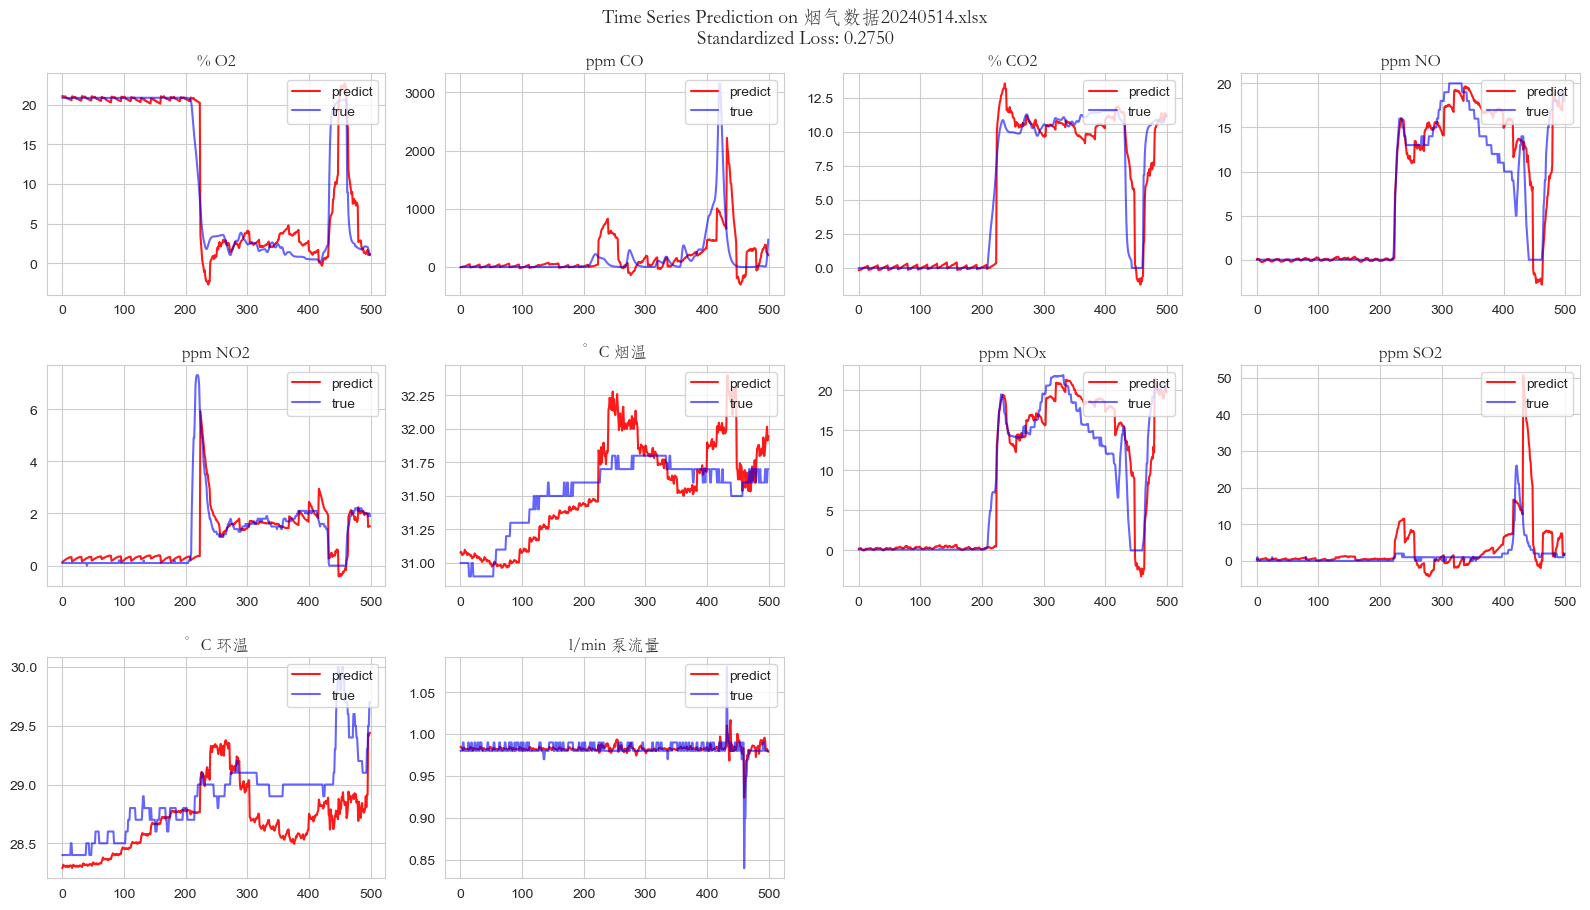

In [8]:
def plot_predictions(MODEL, X_grouped, Y_grouped, var_names, paths,
                    iii=0,
                    figsize=(16,12),
                    device='cpu',
                    var_mean=None,
                    var_std_dev=None,
                    residual_plot=False
                    ):
    '''
    Plot the predictions of the model on a given mat file.
    Parameters:
    - MODEL: torch.nn.Module, the trained model
    - X_grouped: list of (list of (input_length,len(var_names)) numpy array), the input data grouped by mat file
    - Y_grouped: list of (list of (output_length,len(var_names)) numpy array), the output data grouped by mat file
    - var_names: list of strings, the names of the variables
    - paths: list of strings, the paths of the data files
    - iii: int, the index of the mat file to be plotted
    - figsize: tuple of int, the size of the figure
    Return:
    - None
    '''
    # iii=43 # 要在某个mat文件上做预测,选中mat编号(iii)（建议落在测试集对应的编号范围内）

    try:
        from matplotlib.font_manager import FontProperties
        font1 = FontProperties(fname=r"C:\\Windows\\Fonts\\STFANGSO.ttf", size=14)
        font2 = FontProperties(fname=r"C:\\Windows\\Fonts\\STFANGSO.ttf", size=12)
        font3 = FontProperties(fname=r"C:\\Windows\\Fonts\\STFANGSO.ttf", size=10)
        font4 = FontProperties(fname=r"C:\\Windows\\Fonts\\STFANGSO.ttf", size=7)
    except:
        raise Exception("请确保您的系统为Windows系统，并安装了STFANGSO.ttf字体")

    var_mean=var_mean if var_mean is not None else np.zeros(len(var_names)) # 如果给定了变量均值，则使用给定值；否则使用全零均值
    var_std_dev=var_std_dev if var_std_dev is not None else np.ones(len(var_names)) # 如果给定了变量标准差，则使用给定值；否则使用全一标准差

    X_to_predict=[] # 作为输入的真实数据
    Y_to_predict=[] # 待预测的真实数据

    for i in range(len(X_grouped[iii])):
        X_to_predict.append(X_grouped[iii][i])
    X_to_predict=np.array(X_to_predict) # X_to_predict: numpy array. Shape: (num_batches, input_len, input_channels)

    for i in range(len(Y_grouped[iii])):
        Y_to_predict.append(Y_grouped[iii][i])
    Y_to_predict=np.array(Y_to_predict) # Y_to_predict: numpy array. Shape: (num_batches, output_len, output_channels):

    if hasattr(MODEL, 'label_len') and MODEL.label_len > 0: # 如果模型含有label_len属性，说明前向传播过程需要解码器输入
        label_len=MODEL.label_len
        output_len=MODEL.output_len
        pred_len=output_len-label_len
        dec_inp = torch.zeros_like(torch.Tensor(Y_to_predict[:, -pred_len:, :])).float().to(device)
        dec_inp = torch.cat([torch.Tensor(Y_to_predict[:, :label_len, :]).to(device), dec_inp], dim=1).float().to(device)
        Y_to_predict=Y_to_predict[:, -pred_len:, :] # 取待预测时间范围内的数据
        Y_predicted=MODEL(torch.Tensor(X_to_predict).to(device), dec_inp).cpu().detach().numpy() # 根据X_to_predict预测到的数据
    else: # 如果模型不含有label_len属性，说明前向传播过程不需要解码器输入
        Y_predicted=MODEL(torch.Tensor(X_to_predict).to(device)).cpu().detach().numpy() # 根据X_to_predict预测到的数据

    output_channels=Y_predicted.shape[2]
    Y_predicted_flatten=Y_predicted.reshape(-1,output_channels)
    Y_to_predict_flatten=Y_to_predict.reshape(-1,output_channels)
    loss=np.mean((Y_predicted_flatten-Y_to_predict_flatten)**2) # 计算预测误差

    Y_predicted_flatten=(Y_predicted_flatten*var_std_dev)+var_mean # 还原真实值
    Y_to_predict_flatten=(Y_to_predict_flatten*var_std_dev)+var_mean # 还原真实值

    Y_predicted_flatten=Y_predicted_flatten[2000:2500,:]
    Y_to_predict_flatten=Y_to_predict_flatten[2000:2500,:]
    if residual_plot==False:
        plt.figure(figsize=figsize) # figsize is specified in the function parameter
        import os
        plt.suptitle('Time Series Prediction on {}\nStandardized Loss: {:.4f}'.format(
                    os.path.basename(paths[iii]), loss),
                    fontproperties=font1)
        for var_name in var_names:
            var_idx=var_names.index(var_name)
            plt.subplot(4, 4, var_idx+1)
            plt.plot(Y_predicted_flatten[:,var_idx], alpha=0.9, c='red')
            plt.plot(Y_to_predict_flatten[:,var_idx], alpha=0.6, c='blue')
            plt.legend(['predict', 'true'], loc='upper right')
            plt.title(var_name, fontproperties=font2)
        plt.tight_layout(h_pad=2)
        #plt.savefig("", bbox_inches='tight')
        plt.show()
        return
    elif residual_plot==True:
        plt.figure(figsize=figsize) # figsize is specified in the function parameter
        import os
        plt.suptitle('Time Series Prediction on {}\nStandardized Loss: {:.4f}'.format(
                    os.path.basename(paths[iii]), loss),
                    fontproperties=font1)
        for var_name in var_names:
            var_idx=var_names.index(var_name)
            plt.subplot(4, 4, var_idx+1)
            plt.plot(Y_predicted_flatten[:,var_idx]-Y_to_predict_flatten[:,var_idx], alpha=0.9, c='red')
            plt.title(var_name, fontproperties=font2)
        plt.tight_layout(h_pad=2)
        #plt.savefig("", bbox_inches='tight')
        plt.show()
        return
plot_predictions(MODEL, X_grouped, Y_grouped, var_names, data_paths,
                    iii=2,
                    figsize=(16,12),
                    device='cuda',
                    var_mean=var_mean,
                    var_std_dev=var_std_dev,
                    residual_plot=False,
                    )